In [319]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as spc

In [309]:
 # load the first dictionary file
cell = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID269/ID269_06032023_saline/TSeries-03062023-1216-062/suite2p/plane0/cells.pkl"

with open(cell,'rb') as f:
    cell_dict_1 = pickle.load(f)

In [310]:
nfreq = list(cell_dict_1[1]['traces'].keys())
nInt = list(cell_dict_1[1]['traces'][nfreq[0]].keys())
ntrial = list(cell_dict_1[1]['traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [311]:
matrix_all = np.array([[[[cell_dict_1[n]['traces'][i][j][k] for n in cell_dict_1.keys()] for k in ntrial] for j in nInt] for i in nfreq])
print(matrix_all.shape)

(12, 4, 10, 472, 15)


In [312]:
matrix_av = matrix_all.mean(axis=2)
print(matrix_av.shape)
matrix_res = matrix_av[:,:,:,5:].mean(axis=-1) - matrix_av[:,:,:,:5].mean(axis=-1)
print(matrix_res.shape)


(12, 4, 472, 15)
(12, 4, 472)


In [313]:
tuning = []
for i in range(matrix_res.shape[-1]):
    U, S, Vt = np.linalg.svd(matrix_res[:,:,i])
    a, b = np.argmax(np.abs(U[:,0])), np.argmax(np.abs(Vt[0]))
    S = S**2/(S**2).sum()
    if S[0] > 0.5: tuning.append([a,b])

(array([[ 5., 10.,  3.,  9.],
        [ 3., 11.,  5.,  3.],
        [ 3., 10.,  7.,  4.],
        [ 7.,  7.,  0.,  6.],
        [ 9.,  8.,  4.,  5.],
        [ 5.,  5.,  6.,  4.],
        [ 7.,  7.,  2.,  2.],
        [ 7.,  3.,  4.,  6.],
        [ 0.,  5.,  0.,  5.],
        [ 4.,  3.,  6.,  1.],
        [ 4.,  7.,  1.,  0.],
        [ 3.,  6.,  8.,  6.]]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <matplotlib.collections.QuadMesh at 0x1a6824e40a0>)

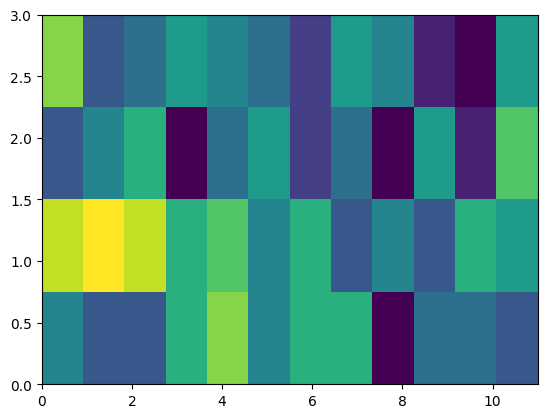

In [314]:
tuning = np.array(tuning)
plt.hist2d(tuning[:,0], tuning[:,1], bins=[12, 4])

In [315]:
# matrix_all = np.swapaxes(matrix_all)
matrix_flatten = (matrix_res).reshape(-1,len(matrix_res[0,0,:]))
print(matrix_flatten.shape)

(48, 472)


In [316]:
scaler = StandardScaler()
matrix_flatten = scaler.fit_transform(matrix_flatten)

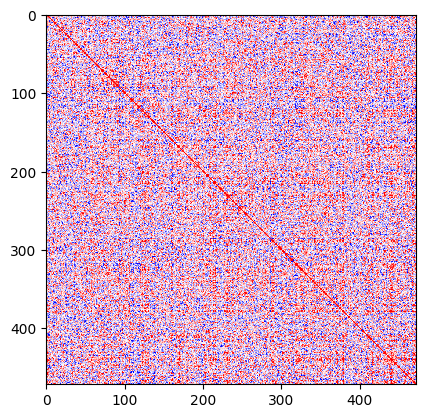

In [321]:
# Compute the pairwise correlations for every cell 
cc = 1-pairwise_distances(matrix_flatten.T, metric='correlation')
plt.imshow(cc, vmin=-0.2, vmax=0.2, cmap='bwr')





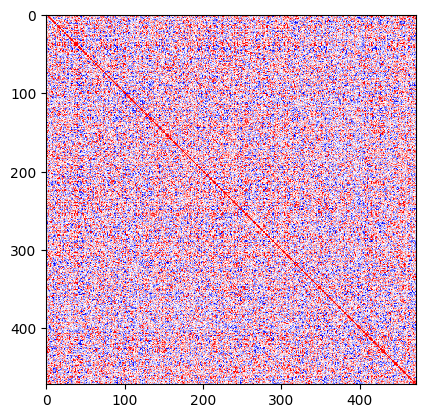

In [320]:
# Run hierarchical clustering on the correlation matrix. 
pdist = spc.distance.pdist(cc)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
plt.imshow(cc[idx][:,idx], vmin=-0.2, vmax=0.2, cmap='bwr')

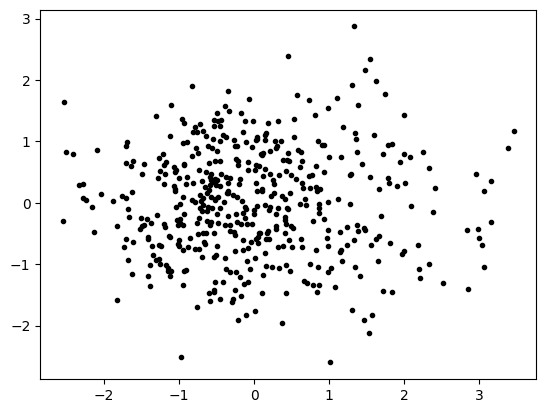

In [318]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cc_fit = pca.fit_transform(cc)

plt.plot(cc_fit[:,0], cc_fit[:,1], 'k.')